### Link for Dataset - https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

Motivated by Gregory Smith's web scrape of VGChartz Video Games Sales, this data set simply extends the number of variables with another web scrape from Metacritic. Unfortunately, there are missing observations as Metacritic only covers a subset of the platforms. Also, a game may not have all the observations of the additional variables discussed below. Complete cases are ~ 6,900

Alongside the fields: Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, we have:-

Critic_score - Aggregate score compiled by Metacritic staff
Critic_count - The number of critics used in coming up with the Critic_score
User_score - Score by Metacritic's subscribers
User_count - Number of users who gave the user_score
Developer - Party responsible for creating the game
Rating - The ESRB ratings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv('G:\\D\\git\\main\\Python\\udemy-projects\\Video-Game-Sales-with-Ratings\\Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
data_df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [4]:
data_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
data_df['User_Score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16714    NaN
16715    NaN
16716    NaN
16717    NaN
16718    NaN
Name: User_Score, Length: 16719, dtype: object

### Which factor(s) affect(s) the Global sales of the games ?

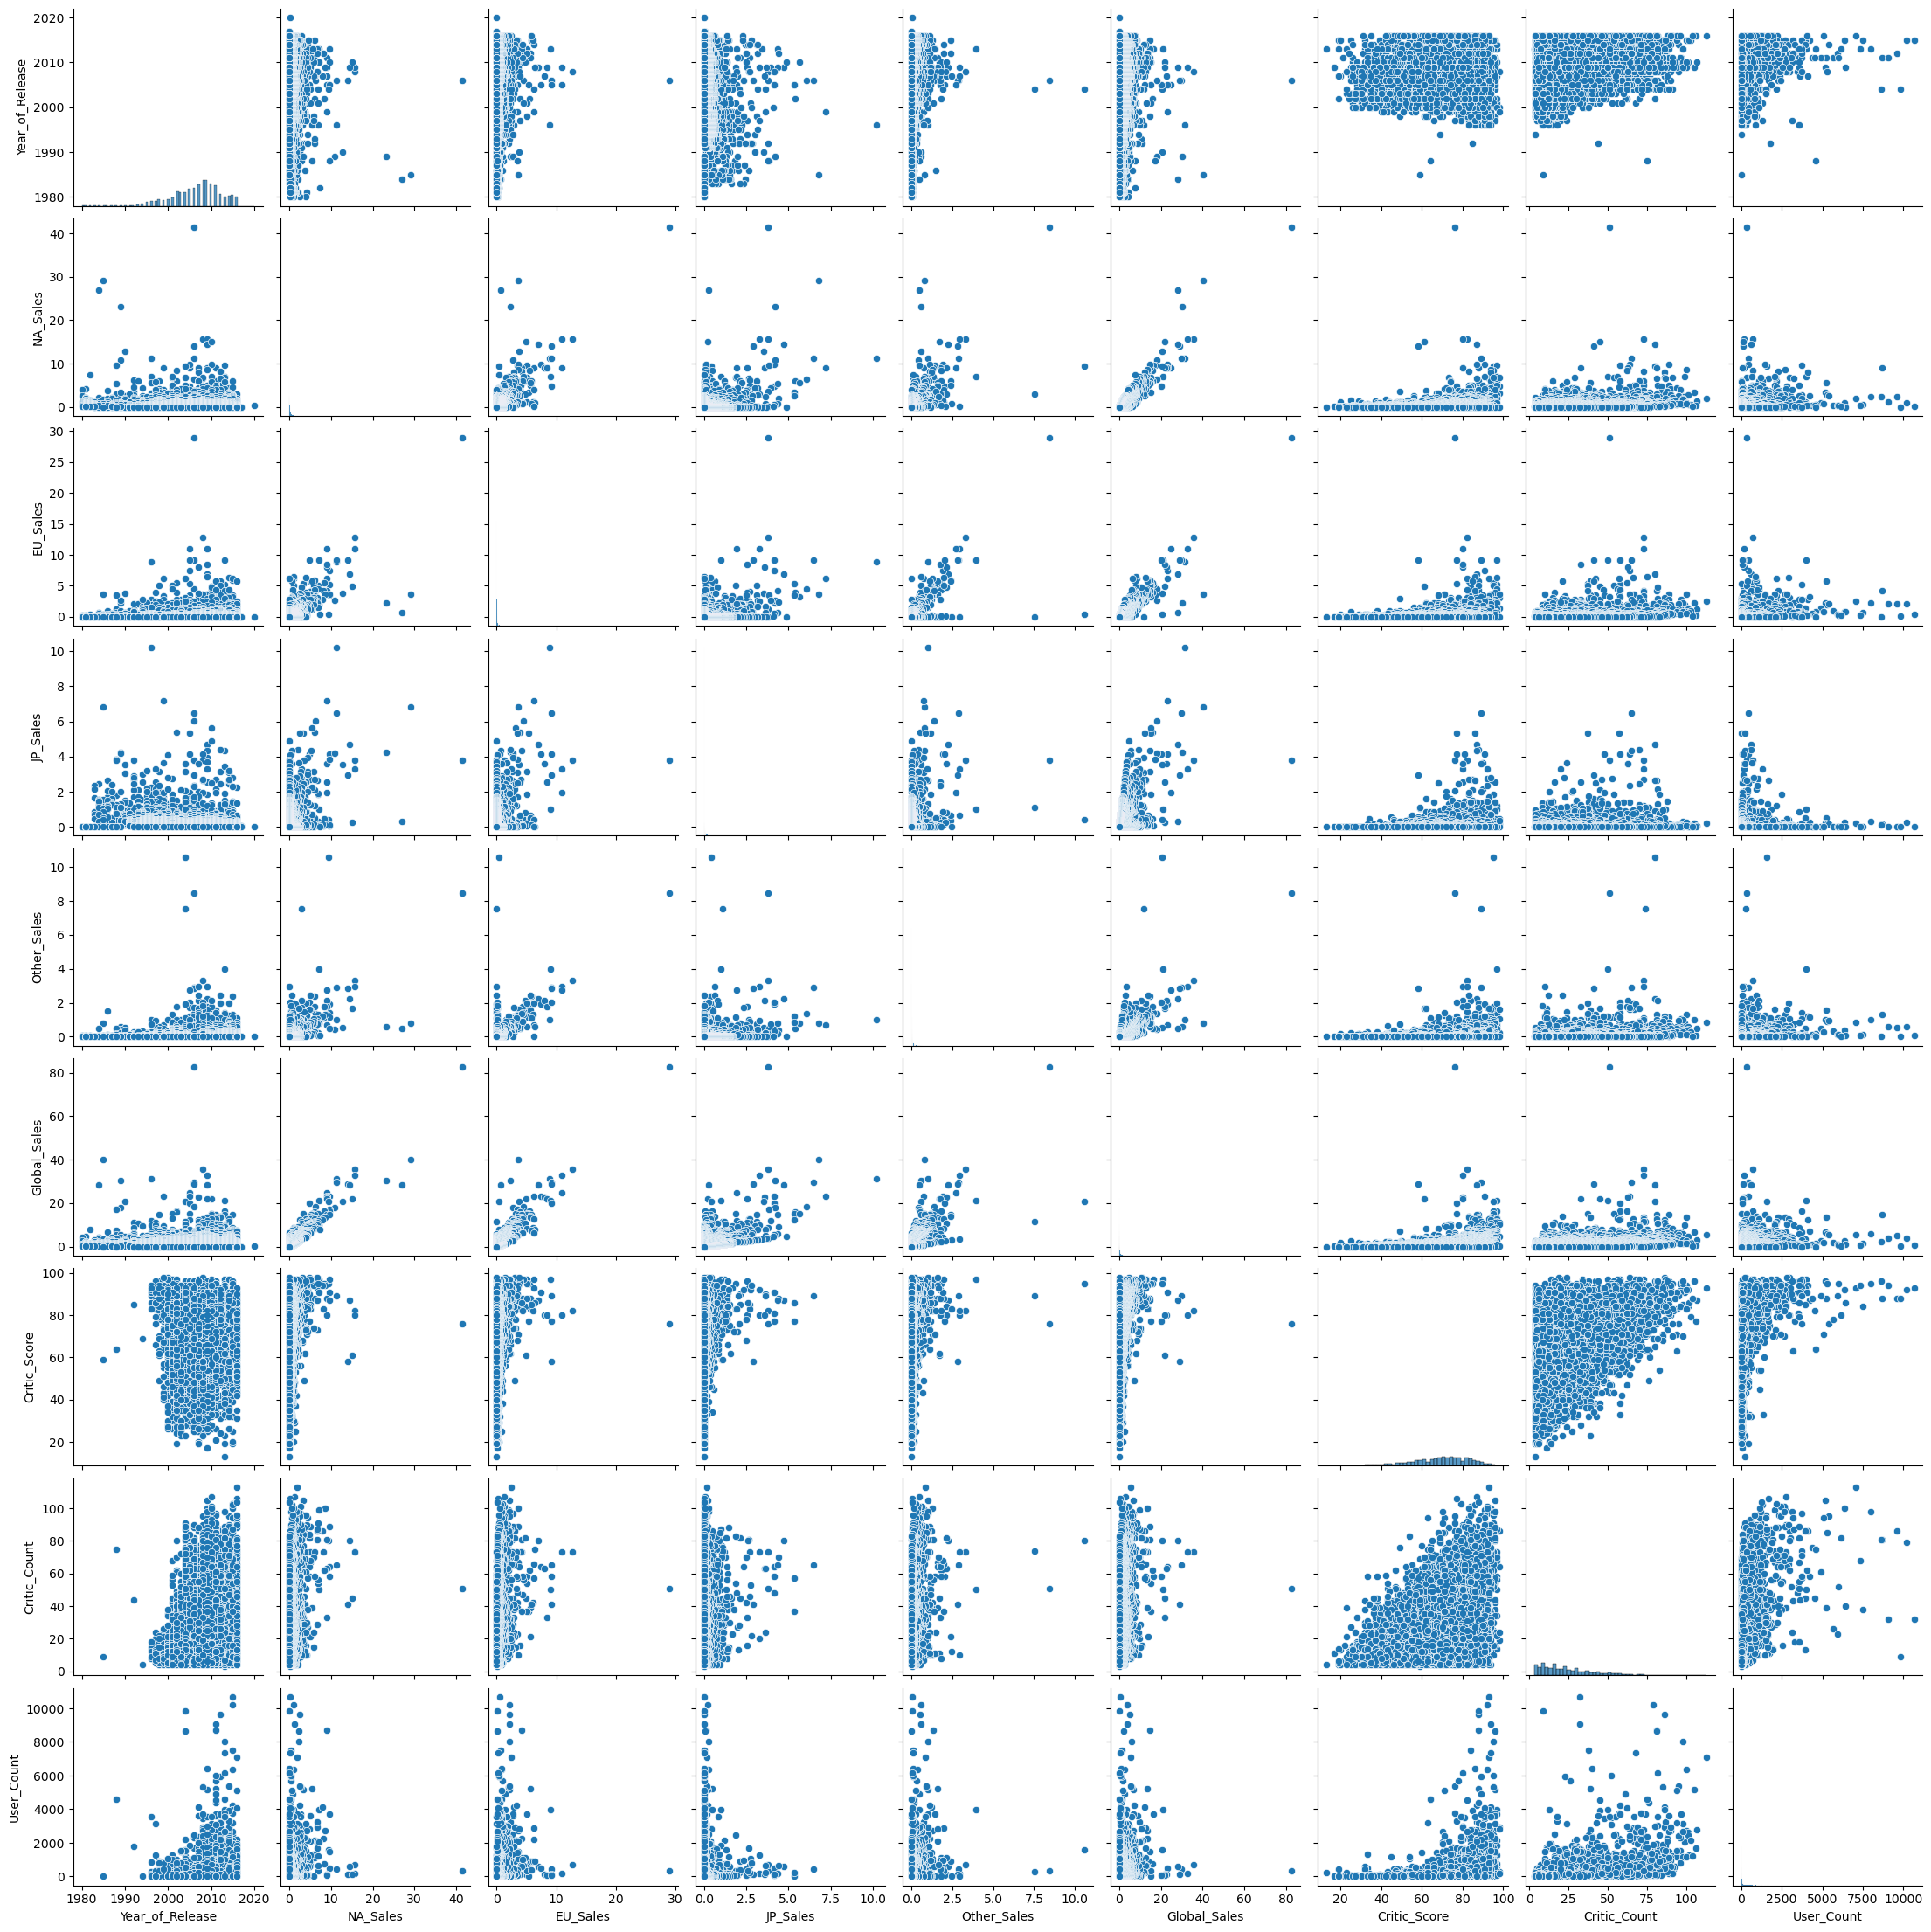

In [7]:
sns.pairplot(data_df)

### Lets try focusing on Sales related columns only

<Axes: >

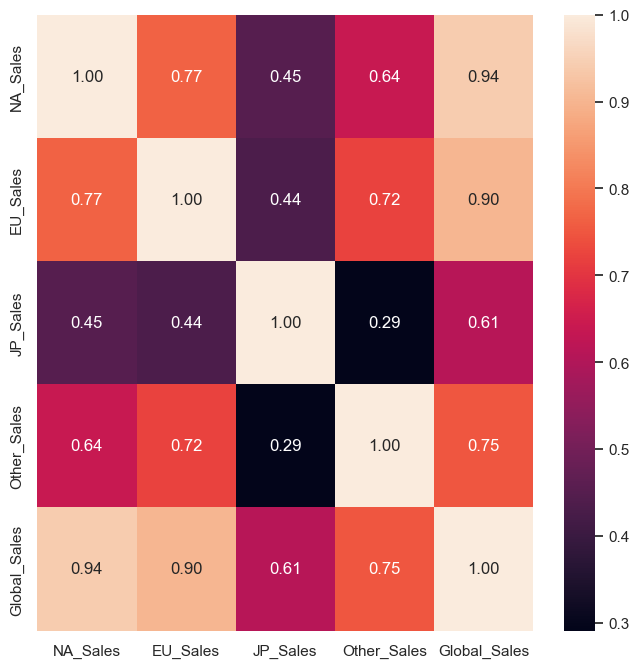

In [13]:
sns.heatmap(data_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(),
           annot=True, fmt='.2f')

### User and Critics score

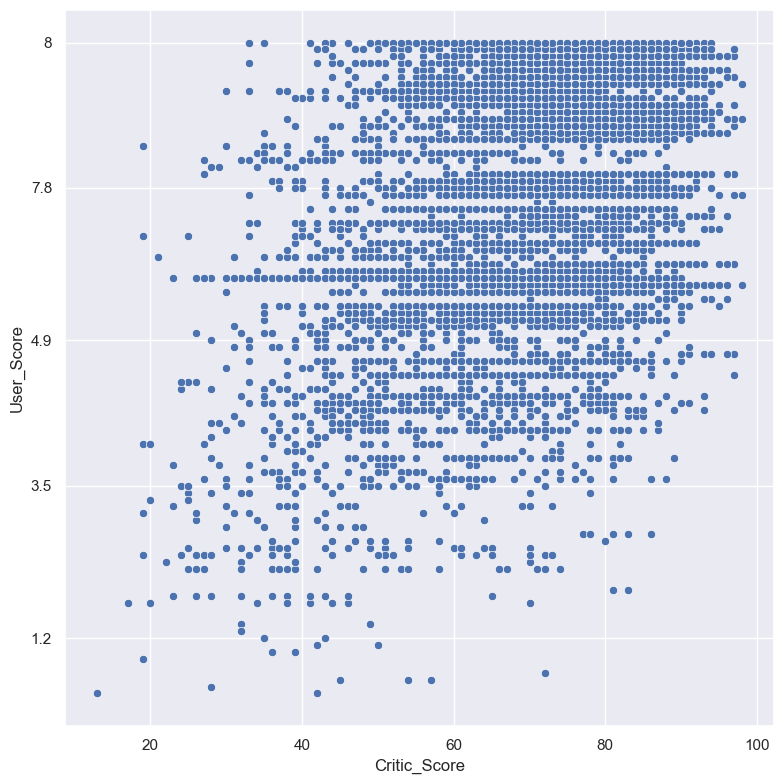

In [14]:
ax =sns.scatterplot(x=data_df['Critic_Score'], y=data_df['User_Score'])
ymin, ymax = ax.get_ylim()
ax.set_yticks(np.round(np.linspace(ymin, ymax, 25, 2)))
plt.tight_layout()
plt.locator_params(axis='y', nbins=6)
plt.show()

In [15]:
score_df = data_df[['Critic_Score', 'User_Score']]
score_df = score_df[score_df['User_Score']!='tbd']
score_df['User_Score'] = pd.to_numeric(score_df['User_Score'], errors='coerce')
score_df.dropna(how='any', inplace=True)

In [16]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7017 entries, 0 to 16709
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Critic_Score  7017 non-null   float64
 1   User_Score    7017 non-null   float64
dtypes: float64(2)
memory usage: 164.5 KB


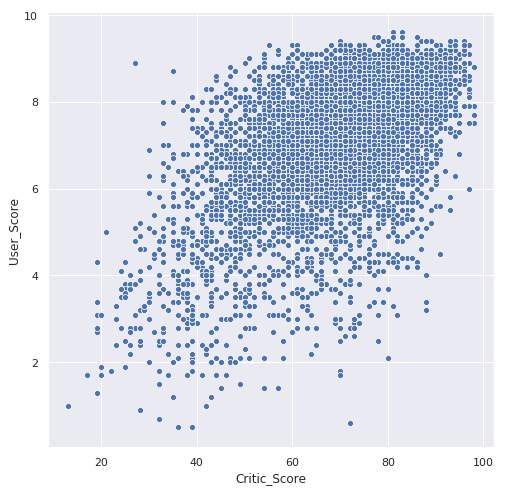

In [13]:
sns.scatterplot(x=score_df['Critic_Score'], y=score_df['User_Score'])

In [17]:
score_df.corr()

,Critic_Score,User_Score
Critic_Score,1.000000,0.580878
User_Score,0.580878,1.000000


In [15]:
score_df.corr(method='spearman')

,Critic_Score,User_Score
Critic_Score,1.000000,0.536182
User_Score,0.536182,1.000000


## Lets move on to Genre

<Axes: xlabel='Genre', ylabel='Count'>

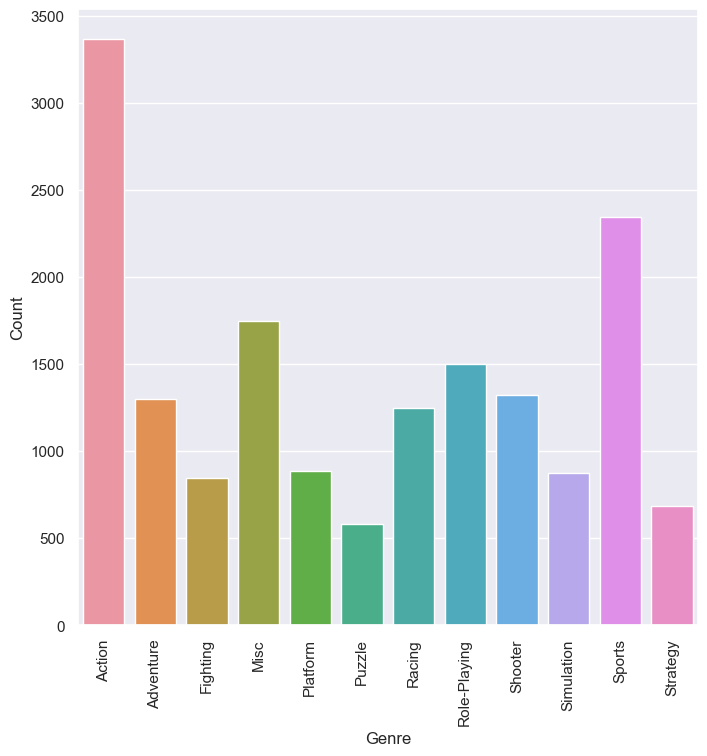

In [26]:
plt.xticks(rotation=90)
genre_group = data_df.groupby('Genre').size()
genre_group = genre_group.to_frame().reset_index().rename(columns={0:"Count"})
sns.barplot(data=genre_group,x='Genre',y='Count')

In [17]:
data_df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

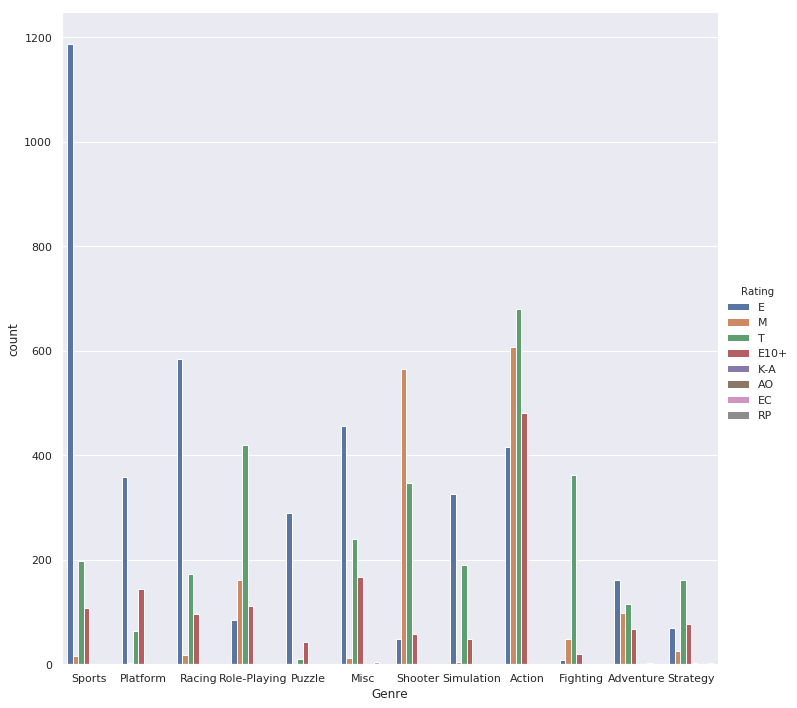

In [18]:
g = sns.catplot(x="Genre", hue="Rating", 
                 data=data_df, kind="count",
                 height=10);

In [19]:
count_year_gen = pd.DataFrame({'count' : data_df.groupby( [ "Genre", "Year_of_Release"] ).size()}).reset_index()
print(data_df.groupby( [ "Genre", "Year_of_Release"] ).size())

Genre     Year_of_Release
Action    1980.0               1
          1981.0              25
          1982.0              18
          1983.0               7
          1984.0               1
          1985.0               2
          1986.0               6
          1987.0               2
          1988.0               2
          1989.0               2
          1990.0               3
          1991.0               5
          1992.0               1
          1993.0               6
          1994.0               4
          1995.0               8
          1996.0              20
          1997.0              31
          1998.0              44
          1999.0              40
          2000.0              44
          2001.0              67
          2002.0             125
          2003.0             144
          2004.0             125
          2005.0             192
          2006.0             184
          2007.0             210
          2008.0             221
          2009.0 

## Releases by Genre

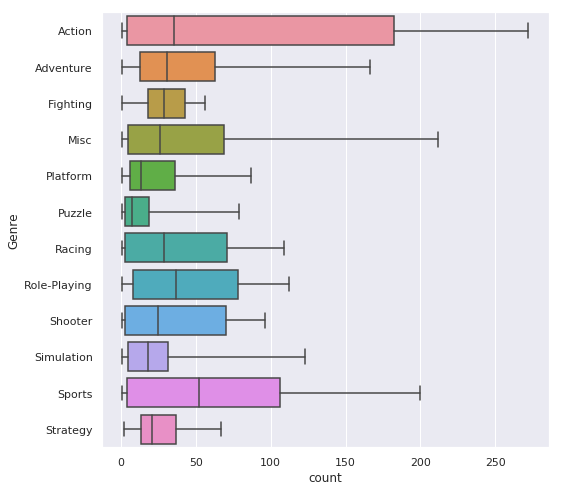

In [20]:
ax = sns.boxplot(x="count", y="Genre", data=count_year_gen, whis=np.inf)

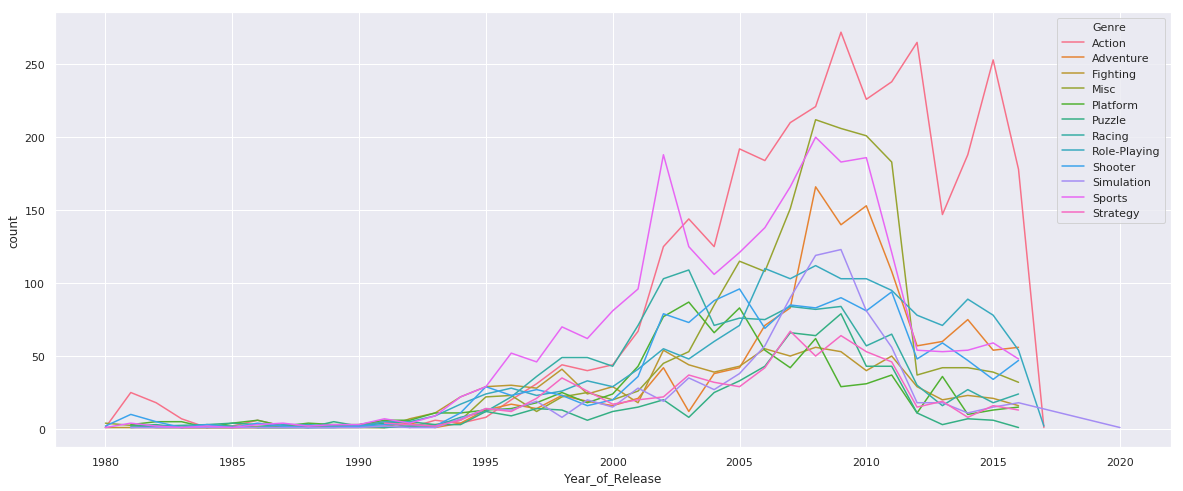

In [21]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.lineplot(x="Year_of_Release", y="count", hue="Genre",data=count_year_gen)

### Code modified from : https://bokeh.pydata.org/en/latest/docs/user_guide/interaction/legends.html

In [22]:
from bokeh.palettes import Spectral11
from bokeh.plotting import figure, output_file, show
from bokeh.models import Legend, LegendItem
p = figure(plot_width=800, plot_height=550)
p.background_fill_color = "beige"

p.title.text = 'Click on legend entries to hide the corresponding lines'
import random
legend_list = []
for genre_id in count_year_gen['Genre'].unique():
    color = random.choice(Spectral11)
    df = pd.DataFrame(count_year_gen[count_year_gen['Genre']==genre_id])
    p.line(df['Year_of_Release'], df['count'], line_width=2, alpha=0.8, color=color, legend=genre_id)

p.legend.location = "top_left"
p.legend.click_policy="hide"

show(p)

## Sales per Genre per region

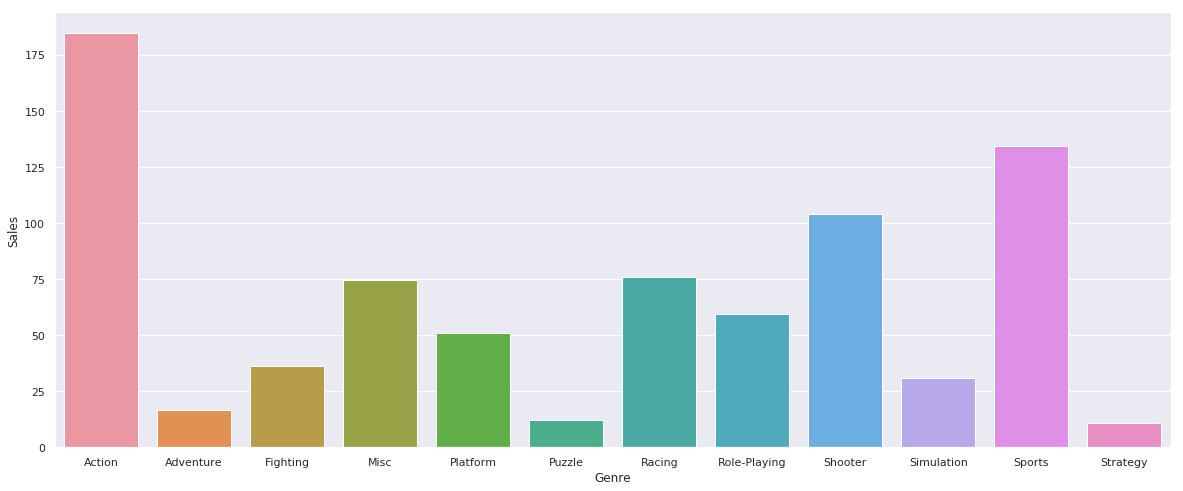

In [26]:
genre_region_other = pd.DataFrame({'Sales' : data_df.groupby("Genre")['Other_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales', data=genre_region_other)

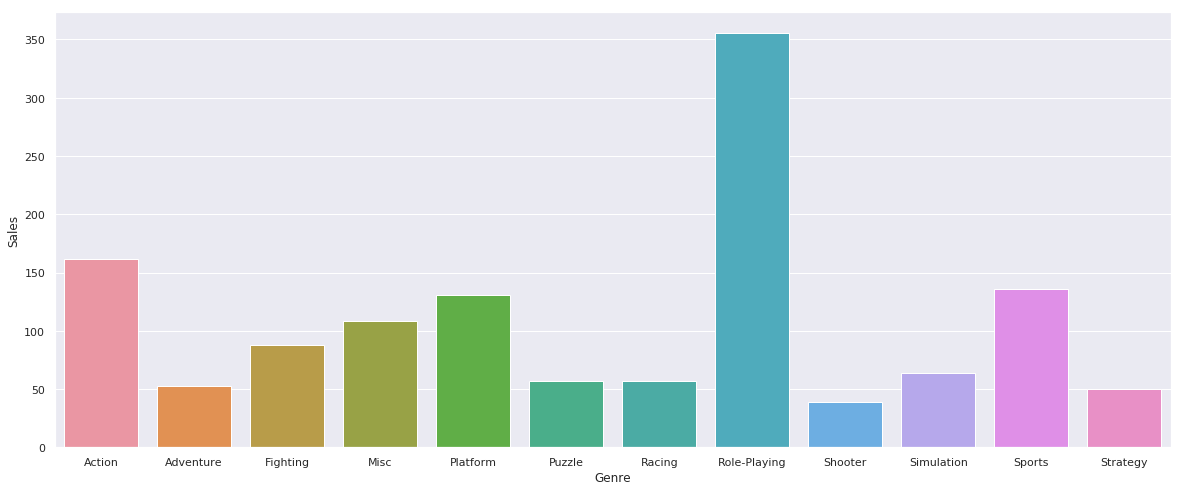

In [25]:
genre_region_jp = pd.DataFrame({'Sales' : data_df.groupby("Genre")['JP_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales', data=genre_region_jp)

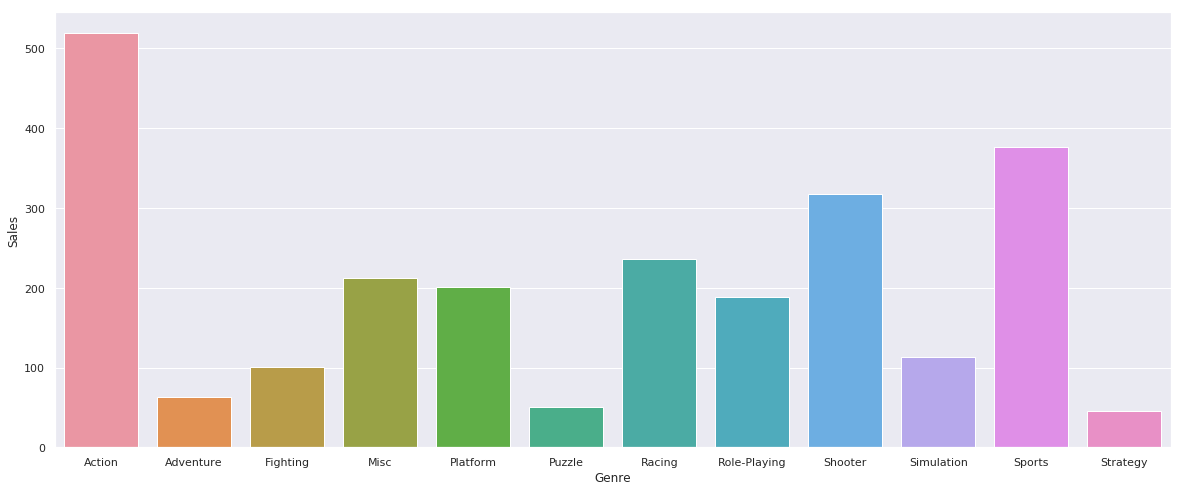

In [24]:
genre_region_eu = pd.DataFrame({'Sales' : data_df.groupby("Genre")['EU_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales', data=genre_region_eu)

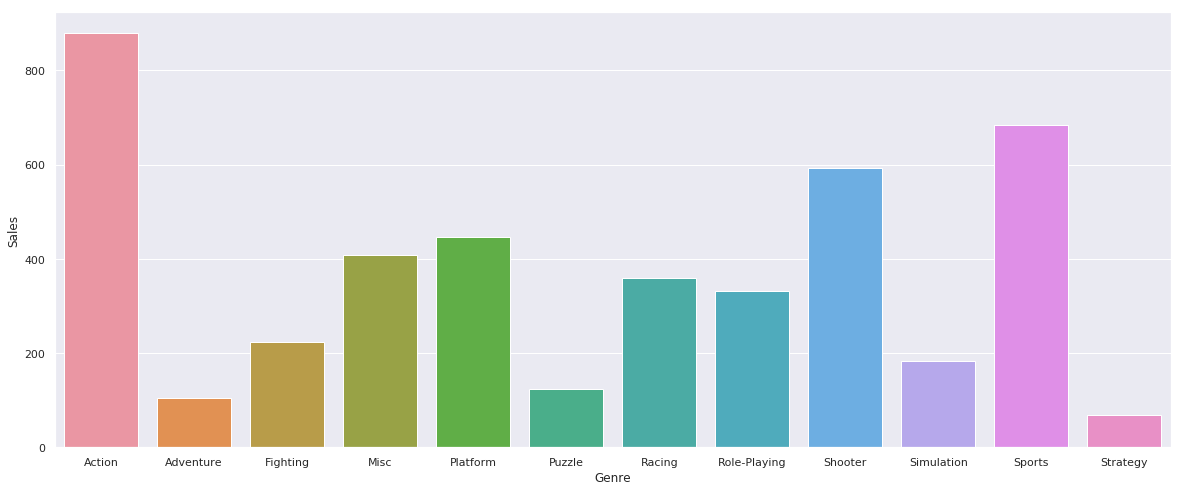

In [23]:
genre_region_na = pd.DataFrame({'Sales' : data_df.groupby("Genre")['NA_Sales'].sum()}).reset_index()
sns.barplot(x='Genre',y='Sales', data=genre_region_na)

In [27]:
platform_group = pd.DataFrame({'count' : data_df.groupby( [ "Platform", "Year_of_Release"] ).size()}).reset_index()
print(data_df.groupby( [ "Platform", "Year_of_Release"] ).size())

Platform  Year_of_Release
2600      1980.0               9
          1981.0              46
          1982.0              36
          1983.0              11
          1984.0               1
          1985.0               1
          1986.0               2
          1987.0               6
          1988.0               2
          1989.0               2
3DO       1994.0               1
          1995.0               2
3DS       2011.0             116
          2012.0              93
          2013.0              91
          2014.0              80
          2015.0              86
          2016.0              46
DC        1998.0               7
          1999.0              14
          2000.0              20
          2001.0               8
          2002.0               1
          2007.0               1
          2008.0               1
DS        1985.0               1
          2004.0              23
          2005.0             118
          2006.0             201
          2007.0 

## Releases per platform

In [28]:
p = figure(plot_width=1200, plot_height=850)
p.background_fill_color = "beige"

p.title.text = 'Click on legend entries to hide the corresponding lines'
import random
legend_list = []
for platform_id in platform_group['Platform'].unique():
    color = random.choice(Spectral11)
    df = pd.DataFrame(platform_group[platform_group['Platform']==platform_id])
    p.line(df['Year_of_Release'], df['count'], line_width=2, alpha=0.8, color=color, legend=platform_id)

p.legend.location = "top_left"
p.legend.click_policy="hide"

show(p)

## Genre by Critics Score

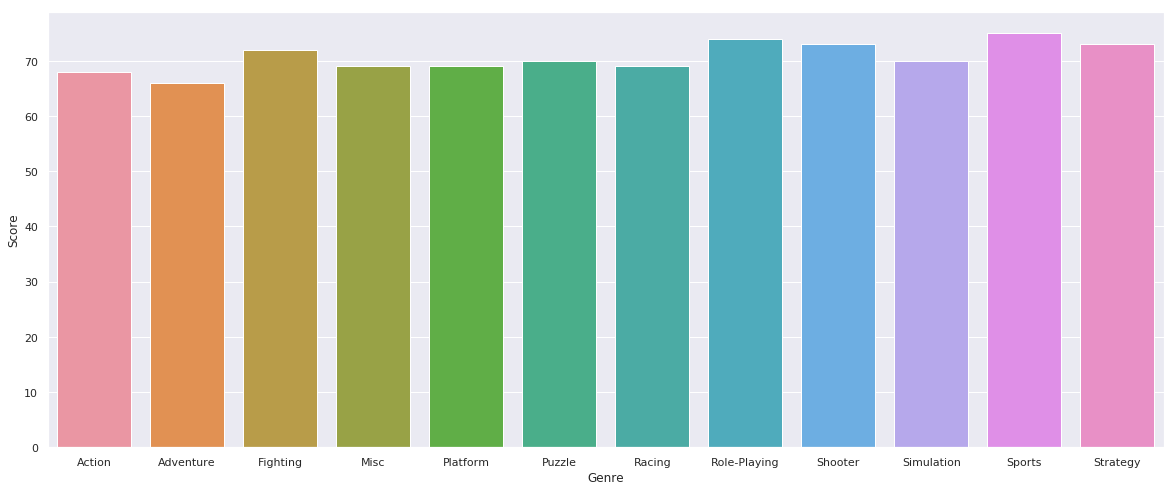

In [29]:
critic_genre_score = pd.DataFrame({'Score' : data_df.groupby("Genre")['Critic_Score'].median()}).reset_index()
sns.barplot(x='Genre',y='Score', data=critic_genre_score)

## Genre By User Score

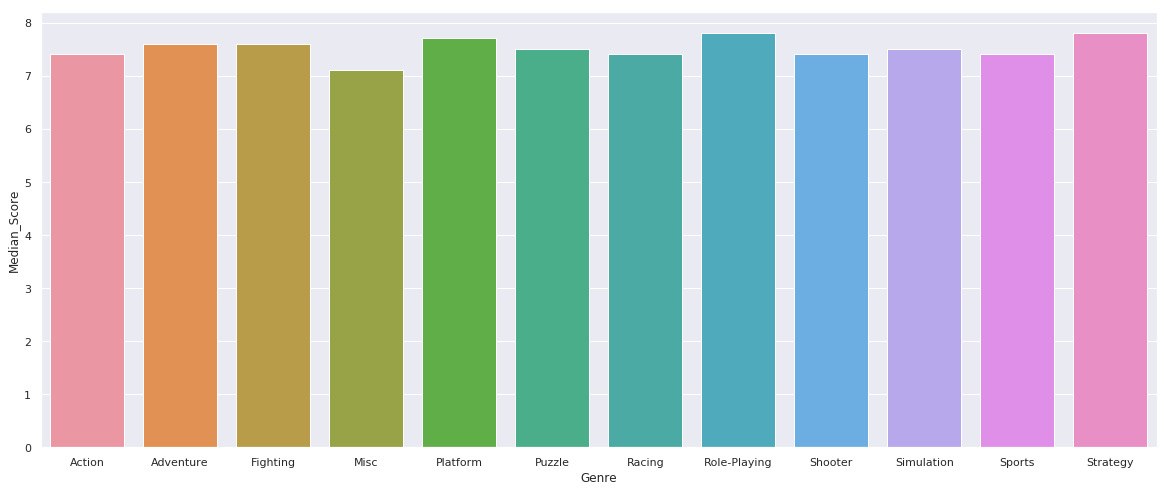

In [30]:
user_score_df = data_df[['Genre', 'User_Score']]
user_score_df = user_score_df[user_score_df['User_Score']!='tbd']
user_score_df['User_Score'] = pd.to_numeric(user_score_df['User_Score'], errors='coerce')
user_genre_df = pd.DataFrame({'Median_Score' : user_score_df.groupby("Genre")['User_Score'].median()}).reset_index()
ax = sns.barplot(x='Genre',y='Median_Score', data=user_genre_df)


### Top Publisher by Genre

In [31]:
data_df.groupby('Genre')['Publisher'].apply(lambda x: x.value_counts().index[0])

Genre
Action                  Activision
Adventure             Idea Factory
Fighting        Namco Bandai Games
Misc                       Ubisoft
Platform                  Nintendo
Puzzle                    Nintendo
Racing             Electronic Arts
Role-Playing    Namco Bandai Games
Shooter                 Activision
Simulation                 Ubisoft
Sports             Electronic Arts
Strategy        Namco Bandai Games
Name: Publisher, dtype: object